In [17]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("all-mpnet-base-v2")

emb1 = model.encode("corsair vengeance lpx black 32gb 2x16gb ddr4 pc4 17000 2133mhz dual channel kit cmk32gx4m2a2133c13 novatech")
emb2 = model.encode("corsair vengeance lpx black 16gb 2x8gb ddr4 pc4 19200 2400mhz dual channel kit cmk16gx4m2a2400c14 novatech")

cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.9847]])


In [18]:
import ray
from sentence_transformers import SentenceTransformer

ray.shutdown()
ray.init()

@ray.remote
class EmbeddingActor:
    def __init__(self, model_name='all-MiniLM-L6-v2'):
        self.model = SentenceTransformer(model_name)
    
    def get_embeddings(self, sentences):
        return self.model.encode(sentences, show_progress_bar=False)

# Initialize actor
embedding_actor = EmbeddingActor.remote()

# Example usage
sentences = [
    "Apple MacBook Pro (16-inch, 16GB RAM, 1TB Storage, 2.3GHz Intel Core i9) - Space Gray",
    "MacBook Pro 16'' with Intel Core i9, 1TB SSD, 16GB RAM by Apple - Space Grey Model",
    "Samsung 65' Class Q80T QLED 4K UHD HDR Smart TV (2020) with Alexa Built-in",
    "2020 Samsung Q80T 65 Inch 4K Smart QLED TV - HDR - Alexa and Google Assistant Compatible",
    "Bose SoundLink Revolve+ Portable and Long-Lasting Bluetooth 360 Speaker - Triple Black",
    "SoundLink Revolve+ Bluetooth Speaker from Bose - 360 Degree Sound - Triple Black",
    "Nikon D850 FX-Format Digital SLR Camera Body with 45.7 Megapixels and 4K Video Recording",
    "D850 DSLR 45.7MP Camera by Nikon - FX-Format Body Only - 4K Video Capability",
    "Adidas Men's Ultraboost 20 Running Shoe, Cloud White/Core Black, Size 9.5",
    "Men's Adidas Ultraboost 20 Sneakers - Size 9.5 - White/Black Color Scheme",
    "LG C1 Series 77’’ OLED TV (4K, Smart, HDR, OLED77C1PUB) with AI ThinQ 2021 Model",
    "2021 LG 77 Inch C1 OLED Smart TV - 4K HDR, OLED77C1PUB with ThinQ AI Technology",
    "Dyson Cyclone V10 Absolute Lightweight Cordless Stick Vacuum Cleaner",
    "V10 Absolute Cordless Stick Vacuum by Dyson - Lightweight and Cyclone Technology",
    "Razer Blade 15 Gaming Laptop: Intel Core i7-10875H, RTX 2080 Super, 15.6\" FHD 300Hz, 16GB RAM, 1TB SSD",
    "Blade 15 Razer Gaming Notebook - FHD 300Hz Display - i7-10875H, RTX 2080 Super, 16GB, 1TB",
    "Sony Alpha a7 III Mirrorless Camera with FE 28-70 mm F3.5-5.6 OSS Lens Kit",
    "a7 III Mirrorless Full Frame Camera Kit by Sony Alpha - Includes FE 28-70mm Lens",
    "Omega Men's Seamaster Aqua Terra Grey Dial Watch - Stainless Steel, Water Resistant",
    "Seamaster Aqua Terra Watch for Men by Omega - Grey Dial, Stainless Steel Band",
    "Microsoft Surface Pro 7 – 12.3\" Touch-Screen - 10th Gen Intel Core i5 - 8GB Memory - 256GB SSD (Latest Model) – Platinum",
    "Surface Pro 7 Tablet by Microsoft, 12.3-Inch Touchscreen, Intel i5, 8GB RAM, 256GB SSD - Platinum",
    "Philips Hue White & Color Ambiance A19 LED Smart Bulb, Bluetooth & Zigbee Compatible (Hue Hub Optional)",
    "Hue A19 Smart LED Bulb by Philips - White and Color Ambiance, Bluetooth/Zigbee",
    "Garmin Forerunner 945, Premium GPS Running/Triathlon Smartwatch with Music, Black",
    "Forerunner 945 Smartwatch by Garmin - GPS, Music, Running & Triathlon, Black",
    "TCL 6-Series R635 55\" 4K UHD HDR QLED Roku Smart TV",
    "55 Inch TCL Roku Smart TV R635 - 4K QLED HDR 6-Series",
    "KitchenAid KSM150PSER Artisan Tilt-Head Stand Mixer with Pouring Shield, 5-Quart, Empire Red",
    "Artisan Series 5 Qt. Stand Mixer in Empire Red by KitchenAid with Pouring Shield, Model KSM150PSER"
]
future_embeddings = ray.get([embedding_actor.get_embeddings.remote(sentences)])
ray.shutdown()
future_embeddings


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[array([[ 0.03408892,  0.0271883 ,  0.03313164, ..., -0.1055591 ,
         -0.09330184,  0.02417819],
        [ 0.03817191,  0.02614661,  0.05505111, ..., -0.13968489,
         -0.10564709,  0.02032432],
        [-0.01381622,  0.00951949,  0.07468133, ...,  0.00898232,
          0.02300319,  0.07598662],
        ...,
        [ 0.01508861, -0.01119364,  0.01541431, ...,  0.01289743,
         -0.0227292 ,  0.06824695],
        [-0.02624171,  0.01123768,  0.00498199, ..., -0.07190107,
          0.00095619,  0.08722492],
        [-0.03745636,  0.00661824,  0.00315525, ..., -0.08246545,
          0.00046592,  0.09285831]], dtype=float32)]

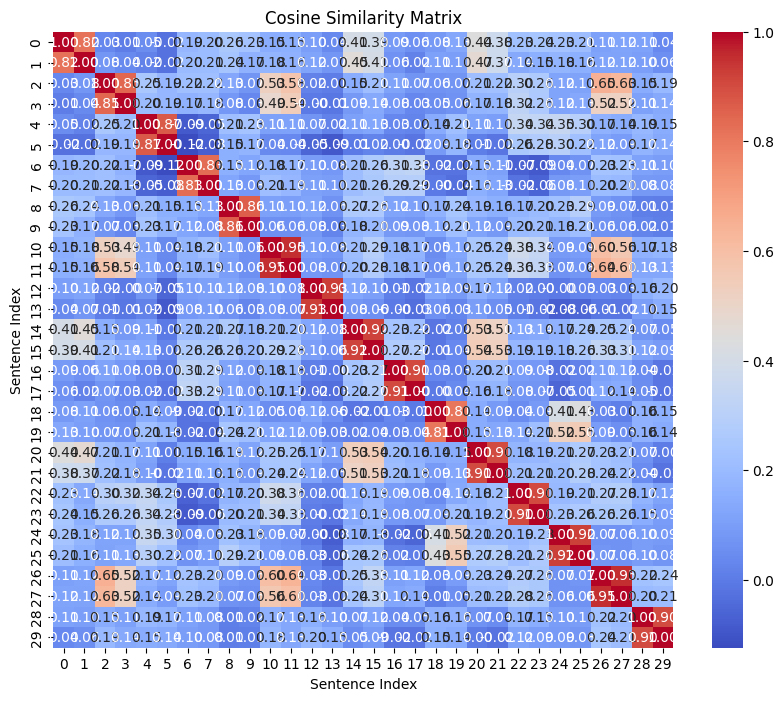

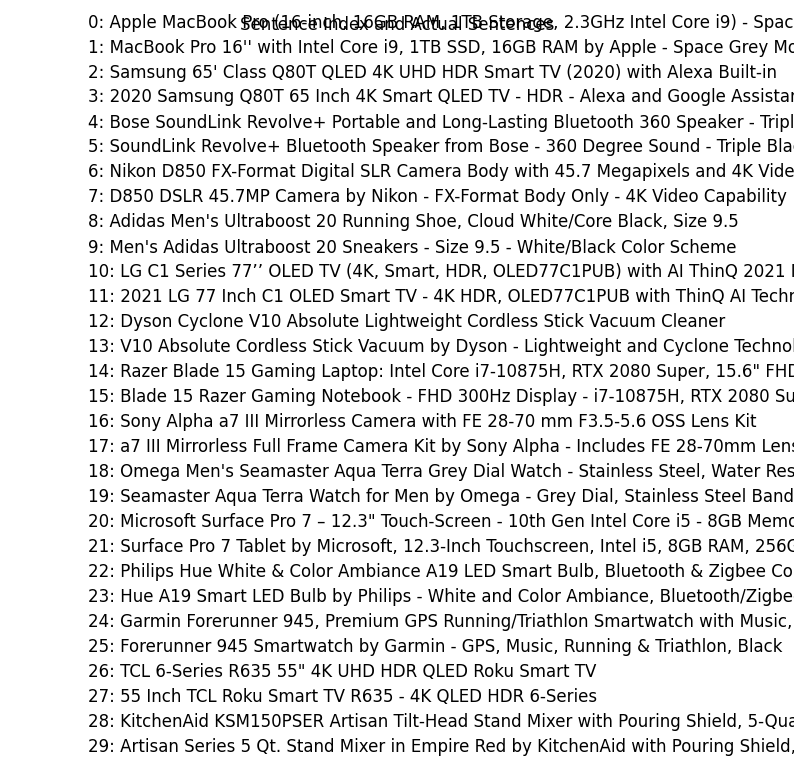

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

def visualize_cosine_similarity(embeddings, sentences):
    # Compute cosine similarity matrix
    cos_sim_matrix = util.cos_sim(embeddings, embeddings).numpy()
    
    # Visualize the cosine similarity matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cos_sim_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Cosine Similarity Matrix")
    plt.xlabel("Sentence Index")
    plt.ylabel("Sentence Index")
    plt.show()

    # Visualize the sentence index and actual sentences
    plt.figure(figsize=(10, len(sentences) * 0.3))  # Dynamically size the figure based on the number of sentences
    plt.axis('off')
    tb = plt.table(cellText=[[f"{i}: {sentence}"] for i, sentence in enumerate(sentences)],
                   loc='center', cellLoc='left', edges='open')
    tb.auto_set_font_size(False)
    tb.set_fontsize(12)
    tb.scale(1, 1.5)
    plt.title("Sentence Index and Actual Sentences")

    plt.show()

# Example usage with your predefined sentences and model
model = SentenceTransformer("all-MiniLM-L6-v2")
product_titles = [
    "Apple MacBook Pro (16-inch, 16GB RAM, 1TB Storage, 2.3GHz Intel Core i9) - Space Gray",
    "MacBook Pro 16'' with Intel Core i9, 1TB SSD, 16GB RAM by Apple - Space Grey Model",
    "Samsung 65' Class Q80T QLED 4K UHD HDR Smart TV (2020) with Alexa Built-in",
    "2020 Samsung Q80T 65 Inch 4K Smart QLED TV - HDR - Alexa and Google Assistant Compatible",
    "Bose SoundLink Revolve+ Portable and Long-Lasting Bluetooth 360 Speaker - Triple Black",
    "SoundLink Revolve+ Bluetooth Speaker from Bose - 360 Degree Sound - Triple Black",
    "Nikon D850 FX-Format Digital SLR Camera Body with 45.7 Megapixels and 4K Video Recording",
    "D850 DSLR 45.7MP Camera by Nikon - FX-Format Body Only - 4K Video Capability",
    "Adidas Men's Ultraboost 20 Running Shoe, Cloud White/Core Black, Size 9.5",
    "Men's Adidas Ultraboost 20 Sneakers - Size 9.5 - White/Black Color Scheme",
    "LG C1 Series 77’’ OLED TV (4K, Smart, HDR, OLED77C1PUB) with AI ThinQ 2021 Model",
    "2021 LG 77 Inch C1 OLED Smart TV - 4K HDR, OLED77C1PUB with ThinQ AI Technology",
    "Dyson Cyclone V10 Absolute Lightweight Cordless Stick Vacuum Cleaner",
    "V10 Absolute Cordless Stick Vacuum by Dyson - Lightweight and Cyclone Technology",
    "Razer Blade 15 Gaming Laptop: Intel Core i7-10875H, RTX 2080 Super, 15.6\" FHD 300Hz, 16GB RAM, 1TB SSD",
    "Blade 15 Razer Gaming Notebook - FHD 300Hz Display - i7-10875H, RTX 2080 Super, 16GB, 1TB",
    "Sony Alpha a7 III Mirrorless Camera with FE 28-70 mm F3.5-5.6 OSS Lens Kit",
    "a7 III Mirrorless Full Frame Camera Kit by Sony Alpha - Includes FE 28-70mm Lens",
    "Omega Men's Seamaster Aqua Terra Grey Dial Watch - Stainless Steel, Water Resistant",
    "Seamaster Aqua Terra Watch for Men by Omega - Grey Dial, Stainless Steel Band",
    "Microsoft Surface Pro 7 – 12.3\" Touch-Screen - 10th Gen Intel Core i5 - 8GB Memory - 256GB SSD (Latest Model) – Platinum",
    "Surface Pro 7 Tablet by Microsoft, 12.3-Inch Touchscreen, Intel i5, 8GB RAM, 256GB SSD - Platinum",
    "Philips Hue White & Color Ambiance A19 LED Smart Bulb, Bluetooth & Zigbee Compatible (Hue Hub Optional)",
    "Hue A19 Smart LED Bulb by Philips - White and Color Ambiance, Bluetooth/Zigbee",
    "Garmin Forerunner 945, Premium GPS Running/Triathlon Smartwatch with Music, Black",
    "Forerunner 945 Smartwatch by Garmin - GPS, Music, Running & Triathlon, Black",
    "TCL 6-Series R635 55\" 4K UHD HDR QLED Roku Smart TV",
    "55 Inch TCL Roku Smart TV R635 - 4K QLED HDR 6-Series",
    "KitchenAid KSM150PSER Artisan Tilt-Head Stand Mixer with Pouring Shield, 5-Quart, Empire Red",
    "Artisan Series 5 Qt. Stand Mixer in Empire Red by KitchenAid with Pouring Shield, Model KSM150PSER"
]


# Encode all sentences
embeddings = model.encode(product_titles)

# Visualize the confusion matrix of cosine similarities and sentences
visualize_cosine_similarity(embeddings, product_titles)


In [20]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("hkunlp/instructor-xl")
embeddings = model.encode(
    [
        "Dynamical Scalar Degree of Freedom in Horava-Lifshitz Gravity",
        "Comparison of Atmospheric Neutrino Flux Calculations at Low Energies",
        "Fermion Bags in the Massive Gross-Neveu Model",
        "QCD corrections to Associated t-tbar-H production at the Tevatron",
    ],
    prompt="Represent the Medicine sentence for clustering: ",
)
print(embeddings.shape)
# => (4, 768)

config_sentence_transformers.json: 100%|██████████| 122/122 [00:00<00:00, 519kB/s]
README.md: 100%|██████████| 66.3k/66.3k [00:00<00:00, 308kB/s]
sentence_bert_config.json: 100%|██████████| 53.0/53.0 [00:00<00:00, 273kB/s]
config.json: 100%|██████████| 1.52k/1.52k [00:00<00:00, 7.65MB/s]
pytorch_model.bin: 100%|██████████| 4.96G/4.96G [04:25<00:00, 18.7MB/s]
tokenizer_config.json: 100%|██████████| 2.40k/2.40k [00:00<00:00, 5.06MB/s]
spiece.model: 100%|██████████| 792k/792k [00:00<00:00, 27.1MB/s]
tokenizer.json: 100%|██████████| 2.42M/2.42M [00:00<00:00, 2.70MB/s]
special_tokens_map.json: 100%|██████████| 2.20k/2.20k [00:00<00:00, 2.64MB/s]
1_Pooling/config.json: 100%|██████████| 270/270 [00:00<00:00, 2.65MB/s]
pytorch_model.bin: 100%|██████████| 3.15M/3.15M [00:00<00:00, 12.5MB/s]
2_Dense/config.json: 100%|██████████| 116/116 [00:00<00:00, 532kB/s]


(4, 768)
